<a href="https://colab.research.google.com/github/marianataqi/Maria_Portfolio/blob/main/danup_web__crowling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import json

 <!DOCTYPE html>

<html dir="rtl" itemscope="" itemtype="http://schema.org/WebPage" lang="fa-IR">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, user-scalable=no" name="viewport"/>
<link href="https://gmpg.org/xfn/11" rel="profile"/>
<meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots">
<link as="script" data-wpacu-preload-js="1" href="//danup.ir/wp-content/cache/asset-cleanup/js/body-ba7ba748bd9f343bd5087e124d775709221bb062.js" rel="preload"/>
<title>آموزش برنامه نویسی وب از 0 تا 100 (ویژه بازار کار) - داناپ</title>
<link as="font" crossorigin="" href="https://danup.ir/wp-content/themes/studiare-child/fonts/woff2/IRANSansWeb(FaNum)_Light.woff2" rel="preload"/>
<link as="font" crossorigin="" href="https://danup.ir/wp-content/themes/studiare-child/fonts/woff2/IRANSansWeb(FaNum).woff2" rel="preload"/>
<link as="font" crossorigin="" href="https://danup.ir/wp-content/plugins/zhanot/assets/fonts/IRANSansWeb_Bold.woff" 
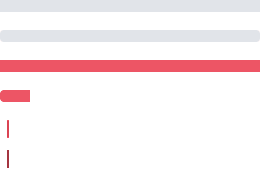
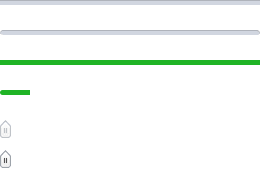
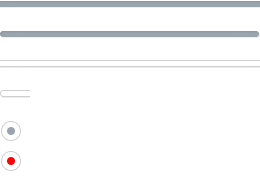
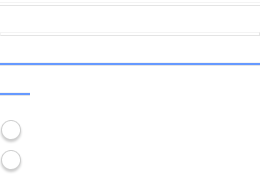
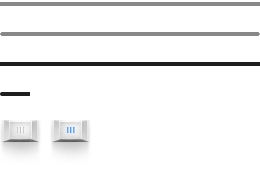
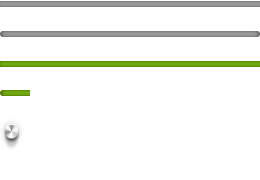

In [5]:
Link = "https://danup.ir/course-category/programming/web-development/"
site = requests.get(Link)
soup = BeautifulSoup(site.text, "html.parser")
soup

In [6]:
numbers = []
p = soup.find('ul',{'class': 'page-numbers'}).find_all('li')

In [7]:
len(p)

9

In [8]:
p[0].text

'1'

In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import json

In [10]:
class danup:

    link = []
    website = []
    website_en = []
    category = []
    title = []
    teacher = []
    duration = []
    price = []
    discount = []

    def convert_numbers(self, t):
        t = t.replace('۰', '0')
        t = t.replace('۱', '1')
        t = t.replace('۲', '2')
        t = t.replace('۳', '3')
        t = t.replace('۴', '4')
        t = t.replace('۵', '5')
        t = t.replace('۶', '6')
        t = t.replace('۷', '7')
        t = t.replace('۸', '8')
        t = t.replace('۹', '9')
        t = t.replace('\n', '')
        return t

    def crawl_data(self, Link, Category):
        site = requests.get(Link)
        soup = BeautifulSoup(site.text, 'html.parser')

        numbers = []
        try:
            p = soup.find('ul', {'class': 'page-numbers'}).find_all('li')
            for i in range(len(p)):
                s = self.convert_numbers(p[i].text)
                if s.isdigit():
                    numbers.append(int(s))
            numbers.sort()
        except:
            p = [1]
            numbers.append(1)

        All_Links = []
        for j in range(1, numbers[-1]+1):
            site = requests.get(Link + f"page/{j}")
            soup = BeautifulSoup(site.text, 'html.parser')
            #soup.prettify()
            x = soup.find_all('div' , {'class': 'courses-holder'})
            x2 = x[0].find_all('div', {'class', 'products grid-view courses-3-columns'})
            x3 = x2[0].find_all('div', {'class': 'course-item'})

            for i in range(len(x3)):
                #All_Links.append(x3[i].a['href'])
                All_Links.append(x3[i].find('h3', {'class': 'course-title'}).a['href'])
                ti = x3[i].find('h3', {'class': 'course-title'}).text
                ti = ti.replace('\n', '')
                self.title.append(ti)
                self.link.append(x3[i].find('h3', {'class': 'course-title'}).a['href'])
                if 1 == 1:
                    try:
                        te = x3[i].find('div', {'class': 'teacher-box'}).a.text
                        te = te.replace('\n', '')
                        te = te.replace('\u200c', ' ')
                        self.teacher.append(te)
                    except:
                        self.teacher.append("")
                try:
                    x4 = x3[i].find('div', {'class': 'course-price'})
                    pr = x4.find('bdi').text
                    pr = pr.replace('\n', '')
                    pr = pr.replace('\xa0', ' ')
                    self.price.append(pr)
                except:
                    self.price.append('0')
                try:
                    dis = x4.find('ins').text
                    dis = dis.replace('\n', '')
                    dis = dis.replace('\xa0', ' ')
                    self.discount.append(dis)
                except:
                    self.discount.append('0')

        for i in range(len(All_Links)):
            site2 = requests.get(All_Links[i])
            soup2 = BeautifulSoup(site2.text, 'html.parser')
            #soup2
            try:
                x = soup2.find('div', {'class': 'product-single-aside sticky-sidebar'})
                x2 = x.find_all('div', {'class': 'product-info-box'})
                #len(x2)
                x3 = x2[1].find_all('div', {'class': 'meta-info-unit'})

                for i in range(len(x3)):
                    if "ساعت" in x3[i].text or "دقیقه" in x3[i].text:
                        T = True
                        index = i
                        break
                    else:
                        T = False

                if T == True:
                    self.duration.append(x3[index].text)
                else:
                    self.duration.append("0")
            except:
                self.duration.append("0")

            self.website.append("داناپ")
            self.website_en.append("danup")
            self.category.append(Category)


    def save(self, l, w, w_en, c, ti, te, du, p, di, path):
        dic = {
            "link": l,
            "website": w,
            "website_en": w_en,
            "category": c,
            "title": ti,
            "teacher": te,
            "duration": du,
            "price": p,
            "discount": di,
        }

        with open(path, 'w', encoding='utf-8') as outfile:
            json.dump(dic, outfile)
        dic.clear()

In [11]:
ob1 = danup()

In [12]:
web = "https://danup.ir/course-category/programming/web-development/"
mobile = "https://danup.ir/course-category/programming/mobile-development/"
game = "https://danup.ir/course-category/programming/game-development/"
database = "https://danup.ir/course-category/programming/database-development/"
programming_tools = "https://danup.ir/course-category/programming/programming-tools/"
iot = "https://danup.ir/course-category/programming/internet-of-things/"
os = "https://danup.ir/course-category/programming/operating-system/"

startup = "https://danup.ir/course-category/business/startup/"
sales = "https://danup.ir/course-category/business/sales/"
management = "https://danup.ir/course-category/business/management/"
accounting = "https://danup.ir/course-category/business/accounting/"
hiring = "https://danup.ir/course-category/business/hiring/"
process_management = "https://danup.ir/course-category/business/process-management/"
systematization = "https://danup.ir/course-category/business/systematization/"
instagram_monetization = "https://danup.ir/course-category/business/instagram-monetization/"
communication_skills = "https://danup.ir/course-category/business/communication-skills/"
business_tools = "https://danup.ir/course-category/business/business-tools/"
coaching = "https://danup.ir/course-category/business/coaching/"
human_resources = "https://danup.ir/course-category/business/human-resources/"

digital_marketing = "https://danup.ir/course-category/marketing/digital-marketing/"
b2b_marketing = "https://danup.ir/course-category/marketing/b2b-marketing/"
branding = "https://danup.ir/course-category/marketing/branding/"
marketing_strategy = "https://danup.ir/course-category/marketing/marketing-strategy/"

video_editing = "https://danup.ir/course-category/multimedia/video-editing/"
animation = "https://danup.ir/course-category/multimedia/animation/"
film_making = "https://danup.ir/course-category/multimedia/film-making/"
motion_graphics = "https://danup.ir/course-category/multimedia/motion-graphics/"

illustrator = "https://danup.ir/course-category/art-graphic/illustrator/"
photoshop = "https://danup.ir/course-category/art-graphic/photoshop/"
corel_draw = "https://danup.ir/course-category/art-graphic/corel-draw/"
indesign = "https://danup.ir/course-category/art-graphic/indesign/"
instagram_content_design = "https://danup.ir/course-category/art-graphic/instagram-content-design/"
user_interface = "https://danup.ir/course-category/art-graphic/user-interface/"
_3ds_max = "https://danup.ir/course-category/art-graphic/3ds-max/"
autocad = "https://danup.ir/course-category/art-graphic/autocad/"
painting = "https://danup.ir/course-category/art-graphic/painting/"

english_language = "https://danup.ir/course-category/foreign-language/english-language/"
german_language = "https://danup.ir/course-category/foreign-language/german-language/"
french_language = "https://danup.ir/course-category/foreign-language/french-language/"
russian_language = "https://danup.ir/course-category/foreign-language/russian-language/"

cryptocurrency = "https://danup.ir/course-category/stock-market-and-cryptocurrency/"
artificial_intelligence = "https://danup.ir/course-category/data-science-and-artificial-intelligence/"
network_security = "https://danup.ir/course-category/network-security/"
personal_development = "https://danup.ir/course-category/personal-development/"
academic_and_engineering = "https://danup.ir/course-category/academic-and-engineering/"

In [13]:
ob1.crawl_data(web, "طراحی وب،طراحی سایت،طراحی وب سایت،برنامه نویسی،web،website،programming")


In [14]:
ob1.crawl_data(mobile, "برنامه نویسی،برنامه نویسی موبایل،mobile،programming")

In [15]:
ob1.crawl_data(game, "بازی،بازی سازی،game")

In [16]:
ob1.crawl_data(database, "پایگاه داده،دیتابیس،دیتا بیس،database")

In [17]:
ob1.crawl_data(programming_tools, "برنامه نویسی،ابزارهای برنامه نویسی،programming")

In [18]:
ob1.crawl_data(iot, "اینترنت اشیا،iot")

In [19]:
ob1.crawl_data(os, "سیستم عامل،os")

In [20]:
ob1.crawl_data(startup, "استارتاپ،استارت اپ،استارت آپ،کسب و کار،بیزینس،startup،business")

In [21]:
ob1.crawl_data(sales, "کسب وکار،فروش،sales،business")

In [22]:

ob1.crawl_data(management, "مدیریت،کسب و کار،management،business")

In [23]:
ob1.crawl_data(accounting, "حسابداری،حساب داری،کسب و کار،business،accounting")

In [24]:
ob1.crawl_data(hiring, "استخدام،کسب و کار،hiring،business")

In [25]:
ob1.crawl_data(process_management, "کسب و کار،مدیریت فرآیند،business،process،management")

In [26]:
ob1.crawl_data(systematization, "کسب و کار،سیستم سازی،systematization،business")

In [27]:
ob1.crawl_data(instagram_monetization, "کسب درآمد،اینستا،اینستاگرام،کسب و کار،کسب درامد،instagram،business")

In [28]:
ob1.crawl_data(communication_skills, "کسب و کار،مهارت،ارتباطی،business،communication،skills")

In [29]:
ob1.crawl_data(business_tools, "کسب و کار،ابزارهای کسب و کار،business tools،business")

In [30]:
ob1.crawl_data(coaching, "کوچ،کوچینگ،مربی،مربیگری،کسب و کار،business،coach،coaching")

In [31]:
ob1.crawl_data(human_resources, "کسب و کار،منابع انسانی،human resources،hr،business")

In [32]:
ob1.crawl_data(digital_marketing, "بازاریابی،مارکتینگ،دیجیتال مارکتینگ،digital marketing،marketing")

In [33]:
ob1.crawl_data(b2b_marketing, "بازاریابی،مارکتینگ،b2b،marketing")

In [34]:
ob1.crawl_data(branding, "بازاریابی،مارکتینگ،برندینگ،marketing،branding")

In [35]:
ob1.crawl_data(marketing_strategy, "بازاریابی،مارکتینگ،استراتژی مارکتینگ،marketing،marketing strategy")

In [36]:
ob1.crawl_data(video_editing, "چند رسانه ای،تدوین،ویدیو،ویدئو،video،edit،editing،,multimedia،چندرسانه ای")

In [37]:
ob1.crawl_data(animation, "چندرسانه ای،چند رسانه ای،انیمیشن،animation،multimedia")

In [38]:
ob1.crawl_data(film_making, "چندرسانه ای،چند رسانه ای،فیلم سازی،multimedia،film making")

In [39]:
ob1.crawl_data(motion_graphics, "چندرسانه ای،چند رسانه ای،موشن گرافیک،multimedia،motion graphics")

In [40]:
ob1.crawl_data(illustrator, "طراحی،گرافیک،ایلوستریتور،design،graphics،illustrator")

In [41]:
ob1.crawl_data(photoshop, "طراحی،گرافیک،فتوشاپ،design،graphics،photoshop")

In [42]:
ob1.crawl_data(corel_draw, "طراحی،گرافیک،کورل دراو،design،graphics،corel drawe")

In [43]:
ob1.crawl_data(instagram_content_design, "طراحی،گرافیک،اینستا،اینستاگرام،طراحی پست اینستاگرام،design،graphics،instagram")

In [44]:
ob1.crawl_data(indesign, "طراحی،گرافیک،ایندیزاین،design،graphics،indesign")

In [45]:
ob1.crawl_data(user_interface, "طراحی،گرافیک،طراحی رابط کاربری،design،graphics،ui،ux،user interface")

In [46]:
ob1.crawl_data(_3ds_max, "طراحی،گرافیک،سه بعدی مکس،سه بعدی،تری دی،انیمیشن،design،graphics،3d،3d max")

In [47]:
ob1.crawl_data(autocad, "طراحی،گرافیک،اتوکد،سه بعدی،تری دی،design،graphics،3d،autocad")

In [48]:
ob1.crawl_data(painting, "طراحی،گرافیک،نقاشی،design،graphics،painting،")

In [49]:
ob1.crawl_data(english_language, "زبان،خارجه،انگلیسی،english،language،خارجی")

In [50]:
ob1.crawl_data(german_language, "زبان،خارجه،خارجی،language،german")

In [51]:
ob1.crawl_data(french_language, "زبان،خارجه،خارجی،language،french")

In [52]:
ob1.crawl_data(russian_language, "زبان،خارجه،خارجی،language،russian")

In [53]:
ob1.crawl_data(cryptocurrency, "بورس،ارز دیجیتال،cryptocurrency")

In [54]:
ob1.crawl_data(artificial_intelligence, "هوش مصنوعی,علوم داده،علم داده،یادگیری ماشین،دیتاساینس،دیتا ساینس،ai،artificial intelligence،machine learning،data science")

In [55]:
ob1.crawl_data(network_security, "امنیت،شبکه،network security")

In [56]:
ob1.crawl_data(personal_development, "توسعه فردی،personal development")

In [57]:
ob1.crawl_data(academic_and_engineering, "آکادمیک،دانشگاه،مهندسی،academic،engineering")

In [58]:
ob1.save(ob1.link, ob1.website, ob1.website_en, ob1.category, ob1.title, ob1.teacher, ob1.duration, ob1.price, ob1.discount, '/content/danup.json')

In [59]:
df = pd.read_json('/content/danup.json')
df

,link,website,website_en,category,title,teacher,duration,price,discount
0,https://danup.ir/courses/typescript-for-beginn...,داناپ,danup,طراحی وب،طراحی سایت،طراحی وب سایت،برنامه نویسی...,آموزش تایپ اسکرپیت (TypeScript),احسان شکاری,\n\n1 ساعت و 31 دقیقه\n,0,0
1,https://danup.ir/courses/javascript-for-hackers/,داناپ,danup,طراحی وب،طراحی سایت،طراحی وب سایت،برنامه نویسی...,آموزش جامع جاوا اسکریپت برای هکرها,مهران کیا,\n\n4 ساعت و 56 دقیقه\n,"1,495,000 تومان","299,000 تومان"
2,https://danup.ir/courses/shopping-website-desi...,داناپ,danup,طراحی وب،طراحی سایت،طراحی وب سایت،برنامه نویسی...,"مگا پکیج آموزش طراحی سایت (Html, Css, PHP, Boo...",علی وحدت منزه,\n\n46 ساعت و 55 دقیقه\n,"2,498,000 تومان","499,600 تومان"
3,https://danup.ir/courses/visual-basic/,داناپ,danup,طراحی وب،طراحی سایت،طراحی وب سایت،برنامه نویسی...,آموزش ویژوال بیسیک Visual Basic – کاملا پروژه ...,رحیم لطفی,\n\n14 ساعت و 19 دقیقه\n,"998,000 تومان","199,600 تومان"
4,https://danup.ir/courses/linq-in-csharp/,داناپ,danup,طراحی وب،طراحی سایت،طراحی وب سایت،برنامه نویسی...,آموزش کار با دستورات LINQ در سی شارپ,رحیم لطفی,\n\n2 ساعت و 23 دقیقه\n,0,0
...,...,...,...,...,...,...,...,...,...
981,https://danup.ir/courses/modeling-parametric-t...,داناپ,danup,آکادمیک،دانشگاه،مهندسی،academic،engineering,آموزش پلاگین Grasshopper در راینو – کاملا پروژ...,آرمان حسن زاده,\n\n1 ساعت و 29 دقیقه\n,"350,000 تومان","70,000 تومان"
982,https://danup.ir/courses/2d-autocad-2020-full-...,داناپ,danup,آکادمیک،دانشگاه،مهندسی،academic،engineering,آموزش اتوکد 2 بعدی 2020 – کاملا پروژه محور,محمدرضا سعادتی,\n\n6 ساعت و 20 دقیقه\n,"750,000 تومان","150,000 تومان"
983,https://danup.ir/courses/watch-design-in-3ds-max/,داناپ,danup,آکادمیک،دانشگاه،مهندسی،academic،engineering,آموزش طراحی ساعت مچی در 3ds max,مصطفی رضایی,\n\n7 ساعت و 15 دقیقه\n,0,0
984,https://danup.ir/courses/full-training-3ds-max/,داناپ,danup,آکادمیک،دانشگاه،مهندسی،academic،engineering,آموزش جامع 3d max و معماری داخلی و خارجی,گروه آموزشی فیلسوف,\n\n5 ساعت و 17 دقیقه\n,"598,000 تومان","119,600 تومان"


In [60]:
df.columns

Index(['link', 'website', 'website_en', 'category', 'title', 'teacher',
       'duration', 'price', 'discount'],
      dtype='object')

In [61]:
import numpy as np
Season = np.random.choice(['Spring', 'Summer', 'Fall', 'Winter'], size=len(df))


df['Season'] = Season


In [62]:
df.columns

Index(['link', 'website', 'website_en', 'category', 'title', 'teacher',
       'duration', 'price', 'discount', 'Season'],
      dtype='object')

In [63]:
df

,link,website,website_en,category,title,teacher,duration,price,discount,Season
0,https://danup.ir/courses/typescript-for-beginn...,داناپ,danup,طراحی وب،طراحی سایت،طراحی وب سایت،برنامه نویسی...,آموزش تایپ اسکرپیت (TypeScript),احسان شکاری,\n\n1 ساعت و 31 دقیقه\n,0,0,Summer
1,https://danup.ir/courses/javascript-for-hackers/,داناپ,danup,طراحی وب،طراحی سایت،طراحی وب سایت،برنامه نویسی...,آموزش جامع جاوا اسکریپت برای هکرها,مهران کیا,\n\n4 ساعت و 56 دقیقه\n,"1,495,000 تومان","299,000 تومان",Fall
2,https://danup.ir/courses/shopping-website-desi...,داناپ,danup,طراحی وب،طراحی سایت،طراحی وب سایت،برنامه نویسی...,"مگا پکیج آموزش طراحی سایت (Html, Css, PHP, Boo...",علی وحدت منزه,\n\n46 ساعت و 55 دقیقه\n,"2,498,000 تومان","499,600 تومان",Fall
3,https://danup.ir/courses/visual-basic/,داناپ,danup,طراحی وب،طراحی سایت،طراحی وب سایت،برنامه نویسی...,آموزش ویژوال بیسیک Visual Basic – کاملا پروژه ...,رحیم لطفی,\n\n14 ساعت و 19 دقیقه\n,"998,000 تومان","199,600 تومان",Summer
4,https://danup.ir/courses/linq-in-csharp/,داناپ,danup,طراحی وب،طراحی سایت،طراحی وب سایت،برنامه نویسی...,آموزش کار با دستورات LINQ در سی شارپ,رحیم لطفی,\n\n2 ساعت و 23 دقیقه\n,0,0,Spring
...,...,...,...,...,...,...,...,...,...,...
981,https://danup.ir/courses/modeling-parametric-t...,داناپ,danup,آکادمیک،دانشگاه،مهندسی،academic،engineering,آموزش پلاگین Grasshopper در راینو – کاملا پروژ...,آرمان حسن زاده,\n\n1 ساعت و 29 دقیقه\n,"350,000 تومان","70,000 تومان",Fall
982,https://danup.ir/courses/2d-autocad-2020-full-...,داناپ,danup,آکادمیک،دانشگاه،مهندسی،academic،engineering,آموزش اتوکد 2 بعدی 2020 – کاملا پروژه محور,محمدرضا سعادتی,\n\n6 ساعت و 20 دقیقه\n,"750,000 تومان","150,000 تومان",Fall
983,https://danup.ir/courses/watch-design-in-3ds-max/,داناپ,danup,آکادمیک،دانشگاه،مهندسی،academic،engineering,آموزش طراحی ساعت مچی در 3ds max,مصطفی رضایی,\n\n7 ساعت و 15 دقیقه\n,0,0,Fall
984,https://danup.ir/courses/full-training-3ds-max/,داناپ,danup,آکادمیک،دانشگاه،مهندسی،academic،engineering,آموزش جامع 3d max و معماری داخلی و خارجی,گروه آموزشی فیلسوف,\n\n5 ساعت و 17 دقیقه\n,"598,000 تومان","119,600 تومان",Summer


In [66]:
from google.colab import drive


drive.mount('/content/drive')

Mounted at /content/drive
